<center> <H1> Testing H1: MRGs that accumulate in 'mitobulbs' are more solid than 'free' MRGs. </H1> </center>


    
            *Code written by Emilie Cuillery and Timo Rey. Laboratory of Experimental Biophysics, EPFL*
                                            *Created between 2018 - 2020*

#### Aims:
    To test whether mitochondrial RNA granules that accumulate inside so-called mitobulbs upon downregulation of mitochondrial fission by Drp1-K38A mutant overexpression.
#### H0:
    MRG-proteins in mitobulb-associated MRGs do not exchange as rapidly as in solitary MRGs.
#### Approach:
    1) Photobleach FASTKD2-tRFP foci in normal COS-7 cells and measure fluorescence recovery.
    2) Transfect COS-7 FASTKD2-tRFP cells with CFP-Drp1K38A to induce mitobulb-formation (visible aggregates of MRGs)
    3) Photobleach FASTKD2-tRFP foci that are part of a mitobulb (>2 MRGs in close proximity) and measure fluorescence recovery.
    4) Compare recovery curves.
#### Use of script:
    1) Specify the location of the input data & an output-directory.
    Requirements:
       INPUT: .csv files of recoveries generated by TrackFRAP.
       Functions from class-file in the same directory as this jupyter notebook.
    2) Run all the cells.
    3) Inspect Results & draw conclusions.

In [9]:
#imports class
%run ./FRAPtA_Classes.ipynb

class was initiated


In [17]:
inDir  = 'C:/Users/Public/Documents/02_MolecExchange-FRAP/03_ProcessedData/'
outDir = 'C:/Users/Public/Documents/02_MolecExchange-FRAP/04_Analysis/'

In [13]:
def single_exp(x, a, b):
    return a*(1-np.exp(-b*x))

# double exponential:
def double_exp(x, a, b, c, d):
    return a*(1-np.exp(-b*x))+c*(1-np.exp(-d*x))

single = True

# FASTKD2-tRFP wildtype

In [18]:
COS7_D2tRFP = None
# specify experiment name:
NamE = r'FASTKD2-tRFP'
# indicate path:
directory = inDir+'COS7_FASTKD2tRFP_TR'
# choose subset:
subset = 's_tRFP'
# number of frames:
frames = 50
# number of pre-bleach steps:
preBl = 3
# seconds per frame:
secPfr = 1
# instantiate class per experiment:
COS7_D2tRFP = FRAPnoTime(NamE,directory,subset,frames,preBl,secPfr)

Condition called 'FASTKD2-tRFP' was successfully created


In [19]:
COS7_D2tRFP.Extract_Data()
COS7_D2tRFP.Mean_and_Std()
COS7_D2tRFP.FitData()

Find data for  FASTKD2-tRFP
Extract data on 50 frames and for 31 files
Raw data extracted and normalised.
Mean and Sandard deviation were successfully computed.
31 data was fit as well as MF & HT computed.


you are fitting with a single exponential
This plot was saved at: C:/Users/Public/Documents/02_MolecExchange-FRAP/04_Analysis/


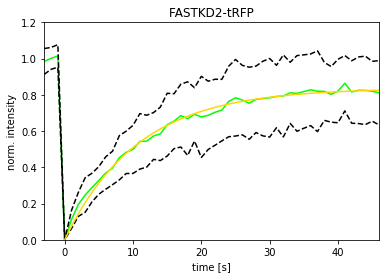

In [20]:
COS7_D2tRFP.PlotFitWerror(outDir, True, color1 = 'lime', color2= 'black', color3 = 'gold') #arguments: outDir[give path], single[true false], color 1-3
plt.savefig(outDir + 'COS7_FASTKD2-tRFPrecovery.svg')

# FASTKD2-tRFP Drp1K38A

In [21]:
COS7_D2k38a = None
# specify experiment name:
NamE = r'FASTKD2-tRFP Drp1K38A'
# indicate path:
directory = inDir+'COS7_FASTKD2tRFP_Drp1k38a_TR'
# choose subset:
subset = 'Intensities-'
# number of frames:
frames = 50
# number of pre-bleach steps:
preBl = 3
# seconds per frame:
secPfr = 1
# instantiate class per experiment:
COS7_D2k38a = FRAPcondition(NamE,directory,subset,frames,preBl,secPfr)

Condition called 'FASTKD2-tRFP Drp1K38A' was successfully created


In [22]:
COS7_D2k38a.Extract_Data()
COS7_D2k38a.Mean_and_Std()
COS7_D2k38a.FitData()

Find data for  FASTKD2-tRFP Drp1K38A
Extract data on 50 frames and for 40 files
Raw data extracted and normalised.
Mean and Sandard deviation were successfully computed.
40 data was fit as well as MF & HT computed.


you are fitting with a double exponential


C:\Users\threy\miniconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


This plot was saved at: C:/Users/Public/Documents/02_MolecExchange-FRAP/04_Analysis/


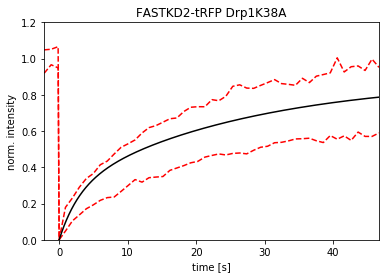

In [25]:
COS7_D2k38a.PlotFitWerror(outDir, False, color1 = 'white', color2= 'red', color3 = 'black') #arguments: outDir[give path], single[true false], color 1-3

# Comparison

In [26]:
def OneRecovery(self, dimensions=(10,5), single=True, clr = 'lime', mn = 'x', ft = 'k-'):
 
    y_mean_plus = []                                                             #upper bound
    for i in range(0,self.Nb_Frames):
        y_mean_plus.append(self.Mean[i] + self.Std[i])    
    y_mean_minus = []                                                            #lower bound 
    for i in range(0,self.Nb_Frames):
        y_mean_minus.append(self.Mean[i] - self.Std[i])   
    
    x = np.arange(0, self.Nb_Frames)
    

    f = plt.figure(1, figsize = dimensions)
    
    plt.plot(x, self.Mean, mn, color = clr)
    plt.plot(x, y_mean_plus, '--', color = clr)
    plt.plot(x, y_mean_minus, '--', color = clr)

    plt.fill_between(x, y_mean_minus, y_mean_plus, color = clr, alpha = 0.3)
    
    # exponential fit:
    x=(self.Data['FRAME'][0:self.Nb_Frames-int(self.Prebleach_Frames)]-1)*self.SecondsPerFrame
    y=self.Mean[int(self.Prebleach_Frames):self.Nb_Frames]
    
    if single == True:
        exponential = single_exp
        print("you are fitting with a single exponential")
    elif single == False:
        exponential = double_exp
        print("you are fitting with a double exponential")    
    
    popt, pcov = curve_fit(exponential, x , y, p0=None)
        
    xx = np.linspace(0,self.Nb_Frames-4,1000)
    yy = exponential(xx, *popt)
    
    plt.plot(3+xx, yy, ft, color = clr, linewidth=3.0)
    
    return f

you are fitting with a single exponential
you are fitting with a single exponential


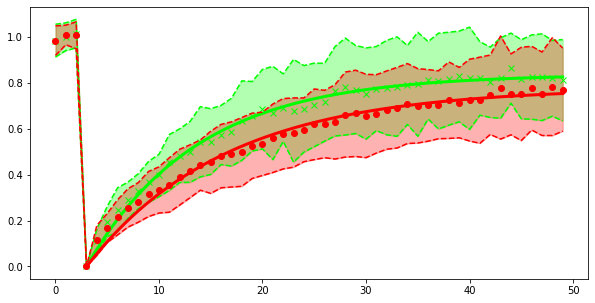

In [29]:
OneRecovery(COS7_D2tRFP)
OneRecovery(COS7_D2k38a, clr = 'red', mn = 'o')

plt.savefig(outDir + cond1.Name + 'vs' + cond2.Name + '.svg')